## Install Packages

In [ ]:
# This is for Google Colab
!sudo apt-get install graphviz
!pip install graphviz
!pip install pydotplus
!pip install sklearn
!pip install pydot
!pip install pandas

## Import Libraries

In [ ]:
import pydotplus
import pandas as pd
import numpy as np
from sklearn import tree
from io import StringIO
import pydot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

## Generate Dataset

In [ ]:
# Generate 5 data points with 2 features, belonging to 2 classes (0, 1)
data = [
  (0, 5, 0),
  (1, 6, 0),
  (2, 7, 1),
  (3, 8, 1),
  (4, 9, 1)
]
df = pd.DataFrame(data, index=range(5), columns=['x1','x2','y'])
df.head()

,x1,x2,y
0,0,5,0
1,1,6,0
2,2,7,1
3,3,8,1
4,4,9,1


In [ ]:
# Train a decision tree model on the data using the entropy measure
x_columns = ['x1','x2']
model = tree.DecisionTreeClassifier(criterion='entropy') # Alternative: gini
trained_model = model.fit(df[x_columns], df['y'])

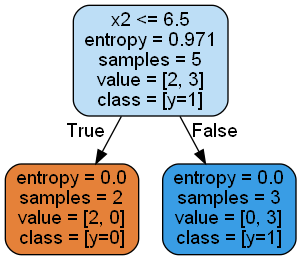

In [ ]:
# Plot the decision tree structure
from IPython.display import Image
out_file = tree.export_graphviz(
        trained_model,
        feature_names = x_columns,
        class_names = ['[y=0]', '[y=1]'],
        filled = True,
        rounded = True
)
graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())

## Import Real Dataset

In [ ]:
# Load the csv dataset (source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication)
dataset = pd.read_csv("bill_authentication.csv")
print(dataset.shape)
dataset.head()

(1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
# Split the dataset into the training and test sets
X = dataset.drop('Class', axis=1)
y = dataset['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Fit Decision Tree

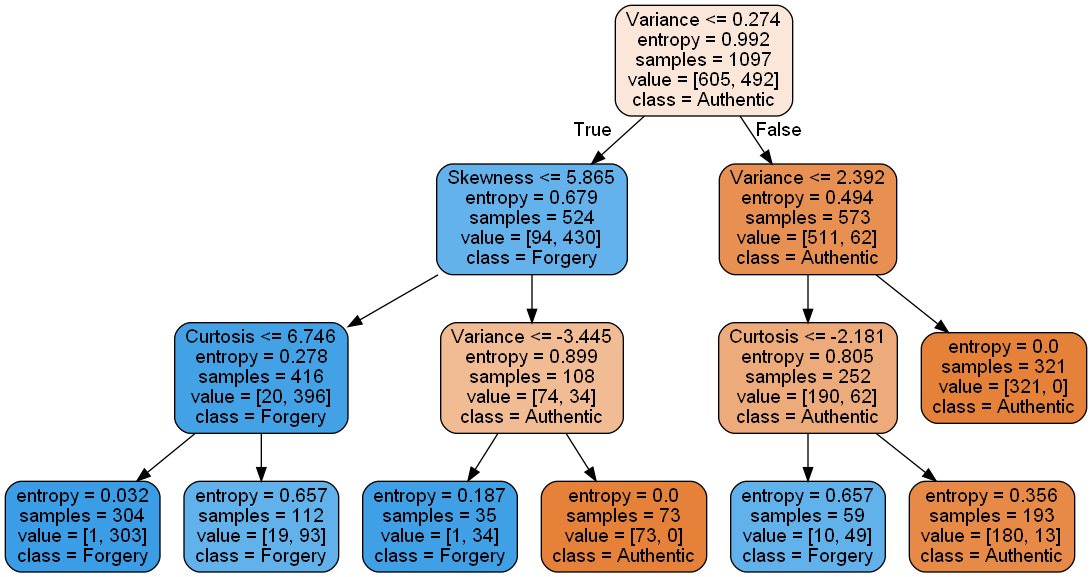

In [ ]:
# Fit a decision tree model on the training set
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
trained_model = model.fit(X_train, y_train)

# Visualize the tree structure
from IPython.display import Image
out_file = tree.export_graphviz(
        trained_model,
        feature_names = ['Variance', 'Skewness', 'Curtosis', 'Entropy'],
        class_names = ['Authentic', 'Forgery'],
        filled = True,
        rounded = True
)
graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())

## Compute Performance

              precision    recall  f1-score   support

   Authentic       0.96      0.93      0.94       157
     Forgery       0.91      0.95      0.93       118

    accuracy                           0.94       275
   macro avg       0.94      0.94      0.94       275
weighted avg       0.94      0.94      0.94       275



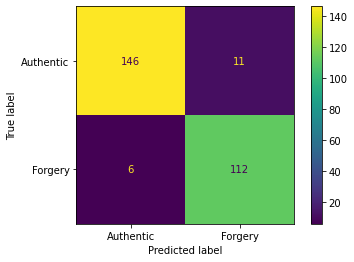

In [ ]:
# Make predictions on the test data points
y_pred = trained_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['Authentic', 'Forgery']))

# Print the confusion matrix
plot_confusion_matrix(trained_model, X_test, y_test, display_labels=['Authentic', 'Forgery'])
plt.show()